In [8]:
import numpy             as np
import gvar              as gv
import matplotlib.pyplot as plt
import pandas            as pd
import lsqfit
import itertools
from tqdm import tqdm

In [9]:
from b2heavy.FnalHISQMetadata import params as mData

In [10]:
from b2heavy.ThreePointFunctions.globalfit import RatioSet

In [11]:
DATA_DIR = '/Users/pietro/code/data_analysis/BtoD/Alex/'
DATA_2PT = '/Users/pietro/Desktop/lattice24/0.25/corr2_3'

In [12]:
ENSEMBLE = 'Coarse-1'

In [13]:
MOMLIST = ['000','100','200','300']
RATLIST = ['QPLUS','RPLUS','RMINUS','XF']

SMSLIST = ['1S','RW']

cov_specs = dict(scale=True,shrink=True,cutsvd=1E-12)

In [14]:
rset = RatioSet(ENSEMBLE,MOMLIST,RATLIST,SMSLIST)
rset.collect(DATA_DIR,DATA_2PT)

100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


In [31]:
from b2heavy.ThreePointFunctions.utils import read_config_fit, dump_fit_object

de_Dst = {}
de_D = {}
de_B = {}
for mom in MOMLIST:
    tag = f'fit2pt_config_{ENSEMBLE}_D_{mom}'
    fit,pars = read_config_fit(tag,path=DATA_2PT)
    de_D[mom] = np.exp(pars['dE'][1])

    tag = f'fit2pt_config_{ENSEMBLE}_Dst_{mom}'
    fit,pars = read_config_fit(tag,path=DATA_2PT)
    de_Dst[mom] = np.exp(pars['dE'][1])

    tag = f'fit2pt_config_{ENSEMBLE}_B_{mom}'
    fit,pars = read_config_fit(tag,path=DATA_2PT)
    de_B[mom] = np.exp(pars['dE'][1])

In [33]:
print('B  ',de_B  )
print('D  ',de_D  )
print('Dst',de_Dst)

B   {'000': 0.365(50), '100': 0.443(51), '200': 0.349(34), '300': 0.341(41)}
D   {'000': 0.479(43), '100': 0.508(28), '200': 0.392(29), '300': 0.399(45)}
Dst {'000': 0.26(13), '100': 0.173(79), '200': 0.217(84), '300': 0.212(47)}


In [30]:
de_D

NameError: name 'dE_D' is not defined

In [97]:
# rset.remove(
#     ('100','QPLUS','RW'),
#     ('200','QPLUS','RW'),
#     ('300','QPLUS','RW'),
# )

In [20]:
priors = rset.params()

In [24]:
TMIN = 2

fit = rset.fit(
    tmin   = TMIN,
    priors = priors,
    **cov_specs
)   

rset.show(fit)


f0                      A_1S                       A_RW  \
mom ratio                                                                      
000 RPLUS     1.017(13)  [-0.015(10), -0.016(15)]   [-0.032(14), -0.017(15)]   
100 QPLUS     0.981(10)  [-0.0229(72), 0.029(15)]   [-0.0046(60), 0.021(13)]   
    RMINUS  -0.1025(51)  [0.0395(85), 0.0061(61)]   [0.0010(95), 0.0065(64)]   
    XF      -0.0900(19)  [0.0429(44), 0.0072(63)]  [-0.0087(49), 0.0095(76)]   
200 QPLUS     0.951(10)   [-0.067(13), 0.007(20)]    [0.018(12), -0.011(16)]   
    RMINUS  -0.1919(73)   [0.067(12), 0.0050(95)]  [0.0010(120), 0.0050(97)]   
    XF      -0.1729(26)  [0.0799(61), 0.0068(98)]   [-0.0237(60), 0.013(11)]   
300 QPLUS     0.909(25)  [-0.166(23), -0.019(47)]    [0.024(20), -0.042(38)]   
    RMINUS   -0.270(15)    [0.100(23), 0.009(21)]     [0.009(20), 0.005(21)]   
    XF      -0.2449(40)    [0.115(10), 0.024(26)]   [-0.0353(80), 0.016(19)]   

                                B_1S                       B_RW  
mom ratio                                                        
000 RPLUS   [-0.015(10), -0.016(15)]   [-0.032(14), -0.017(15)]  
100 QPLUS   [-0.0229(72), 0.029(15)]   [-0.0046(60), 0.021(13)]  
    RMINUS  [0.0395(85), 0.0061(61)]   [0.0010(95), 0.0065(64)]  
    XF      [0.0429(44), 0.0072(63)]  [-0.0087(49), 0.0095(76)]  
200 QPLUS    [-0.067(13), 0.007(20)]    [0.018(12), -0.011(16)]  
    RMINUS   [0.067(12), 0.0050(95)]  [0.0010(120), 0.0050(97)]  
    XF      [0.0799(61), 0.0068(98)]   [-0.0237(60), 0.013(11)]  
300 QPLUS   [-0.166(23), -0.019(47)]    [0.024(20), -0.042(38)]  
    RMINUS    [0.100(23), 0.009(21)]     [0.009(20), 0.005(21)]  
    XF        [0.115(10), 0.024(26)]   [-0.0353(80), 0.016(19)]

In [25]:
rset.fit_result(TMIN,fit,priors=priors)

# ---------- Global fit in 2 for ens: Coarse-1 --------------
Least Square Fit:
  chi2/dof [dof] = 0.73 [180]    Q = 1    logGBF = 673.27

Parameters:
           dE_D     0.318 (16)      [    0.5 (1.0) ]  
           dM_B     0.130 (67)      [    0.5 (1.0) ]  
           dM_D      0.61 (48)      [    0.5 (1.0) ]  
   RPLUS_000_f0     1.017 (13)      [    1.0 (1.5) ]  
 RPLUS_000_1S 0    -0.015 (10)      [      0 ± 1.0 ]  
              1    -0.016 (15)      [      0 ± 1.0 ]  
 RPLUS_000_RW 0    -0.032 (14)      [      0 ± 1.0 ]  
              1    -0.017 (15)      [      0 ± 1.0 ]  
   QPLUS_100_f0     0.981 (10)      [    1.0 (1.5) ]  
 QPLUS_100_1S 0   -0.0229 (72)      [      0 ± 1.0 ]  
              1     0.029 (15)      [      0 ± 1.0 ]  
 QPLUS_100_RW 0   -0.0046 (60)      [      0 ± 1.0 ]  
              1     0.021 (13)      [      0 ± 1.0 ]  
  RMINUS_100_f0   -0.1025 (51)      [ -0.10 (1.50) ]  
RMINUS_100_1S 0    0.0395 (85)      [      0 ± 1.0 ]  
              1    0.006

{'fit': <lsqfit.nonlinear_fit at 0x1701e2750>,
 'chi2red': 131.0029542767987,
 'chi2aug': 131.26442684152195,
 'chiexp': 179.9999999999996,
 'pexp': 0.999,
 'pstd': 0.7691583349955208}

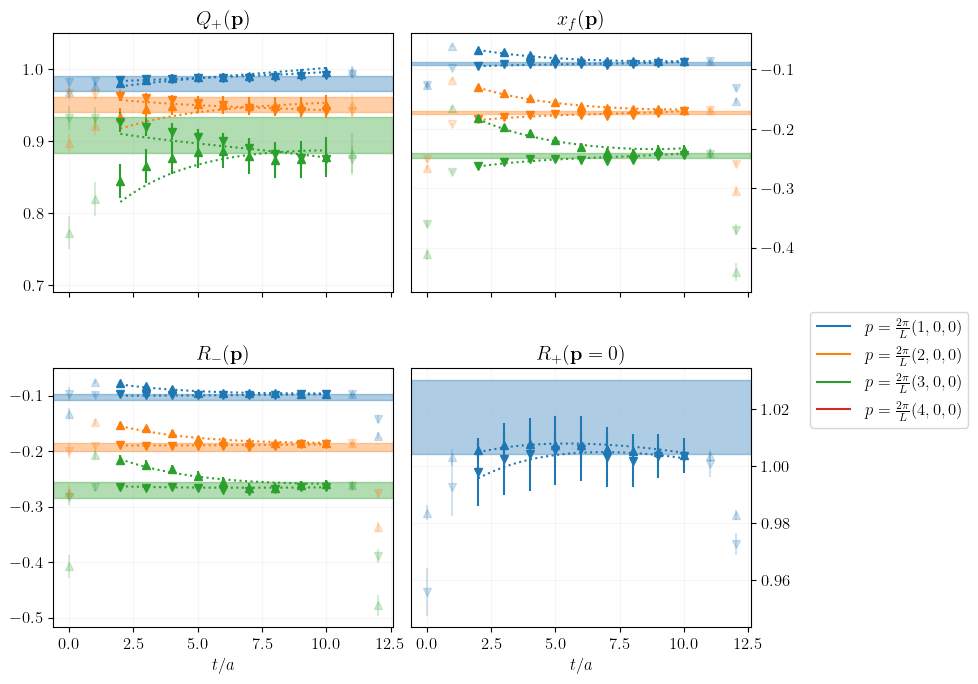

In [26]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

f, ax = plt.subplots(2,2,figsize=(10,7), sharex=True)

rset.plot_fit('QPLUS' ,fit,ax[0,0])
ax[0,0].set_title(r'$Q_{+}(\mathbf{p})$')
# ax[0,0].set_ylim(0.8,1.05)
ax[0,0].set_ylim(ymax=1.05)
ax[0,0].grid(alpha=0.1)

rset.plot_fit('XF'    ,fit,ax[0,1])
ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()
ax[0,1].set_title(r'$x_f(\mathbf{p})$')
# ax[0,1].set_ylim(ymin=-0.3)
ax[0,1].grid(alpha=0.1)


rset.plot_fit('RMINUS',fit,ax[1,0])
ax[1,0].grid(alpha=0.1)
# ax[1,0].set_ylim(ymin=-0.3)
ax[1,0].set_title(r'$R_-(\mathbf{p})$')
ax[1,0].set_xlabel(r'$t/a$')

rset.plot_fit('RPLUS' ,fit,ax[1,1])
ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()
# ax[1,1].set_ylim(ymin=0.9)
ax[1,1].grid(alpha=0.1)
ax[1,1].set_title(r'$R_+(\mathbf{p}=0)$')
ax[1,1].set_xlabel(r'$t/a$')


ax[1,1].errorbar([],[],color='C0',label=r'$p = \frac{2\pi}{L}(1,0,0)$')
ax[1,1].errorbar([],[],color='C1',label=r'$p = \frac{2\pi}{L}(2,0,0)$')
ax[1,1].errorbar([],[],color='C2',label=r'$p = \frac{2\pi}{L}(3,0,0)$')
ax[1,1].errorbar([],[],color='C3',label=r'$p = \frac{2\pi}{L}(4,0,0)$')
ax[1,1].legend(bbox_to_anchor=(1.15, 1.25))



# plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.subplots_adjust(wspace=0.05)

plt.tight_layout()

# plt.savefig(
#     f'/Users/pietro/code/latex/Lattice2024/beamer-presentation-template/PLOTS/ratio_gfit_D.pdf',
#     transparent=True
# )




# Stability test

In [27]:
tmins = [1,2,3,4]

aux = []
TIC = []
pfs = []
for tmin in tqdm(tmins):
    fit = rset.fit(tmin=tmin, priors=priors,**cov_specs)   
    aux.append(
        {k: p for k,p in fit.p.items() if k.endswith('f0')}
    )
    
    res = rset.fit_result(tmin,fit,priors=priors,verbose=False)
    TIC.append(res['chi2aug'] - 2*res['chiexp'])
    pfs.append(res['pstd'])

100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


In [103]:
w = np.exp(-np.array(TIC)/2)
w /= sum(w)
for i,weight in enumerate(w):
    print(f'{tmins[i] = },    {weight = },    {pfs[i] = }')

tmins[i] = 1,    weight = 0.9999995109485724,    pfs[i] = 0.6892831804385479
tmins[i] = 2,    weight = 4.890513665820046e-07,    pfs[i] = 0.6699382512796499
tmins[i] = 3,    weight = 6.109216310405352e-14,    pfs[i] = 0.7046525825989521
tmins[i] = 4,    weight = 9.95102280250038e-21,    pfs[i] = 0.8576166454208465


In [104]:
df = pd.DataFrame(aux)
df

,RPLUS_000_f0,QPLUS_100_f0,RMINUS_100_f0,XF_100_f0,QPLUS_200_f0,RMINUS_200_f0,XF_200_f0,QPLUS_300_f0,RMINUS_300_f0,XF_300_f0
0,1.0174(49),0.9766(29),-0.1346(20),-0.1165(12),0.9150(98),-0.2469(37),-0.2200(22),0.848(21),-0.3299(90),-0.3011(44)
1,1.060(53),0.984(18),-0.142(17),-0.1175(15),0.971(85),-0.263(29),-0.2229(26),1.03(25),-0.345(50),-0.3063(56)
2,1.083(93),1.010(53),-0.183(74),-0.1193(18),1.02(18),-0.34(13),-0.2245(30),1.15(46),-0.47(21),-0.3112(72)
3,1.0187(82),0.9720(61),-0.1340(61),-0.1197(37),0.898(16),-0.248(12),-0.2251(71),0.822(45),-0.354(26),-0.319(16)


/var/folders/7m/b37v945d74n14brv9wkfxwpw0000gn/T/ipykernel_52471/4150968021.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


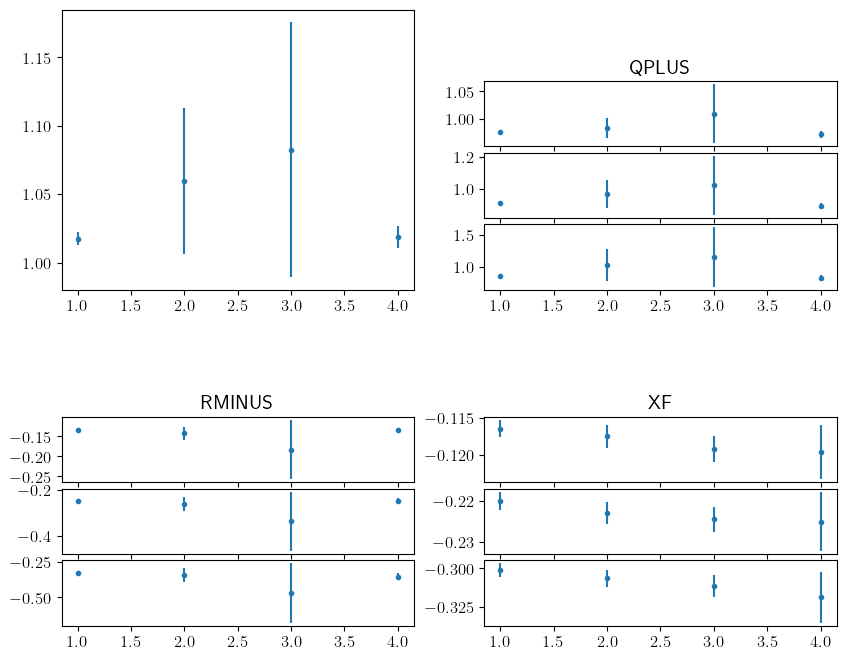

In [105]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 8))
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)


inner = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[0], wspace=0.1, hspace=0.1)
ax = plt.Subplot(fig,inner[0])
rs = df['RPLUS_000_f0'].values
ax.errorbar(tmins, gv.mean(rs), gv.sdev(rs), fmt='.')
fig.add_subplot(ax)




inner1 = gridspec.GridSpecFromSubplotSpec(len(MOMLIST), 1, subplot_spec=outer[1], wspace=0.1, hspace=0.1)
inner2 = gridspec.GridSpecFromSubplotSpec(len(MOMLIST), 1, subplot_spec=outer[2], wspace=0.1, hspace=0.1)
inner3 = gridspec.GridSpecFromSubplotSpec(len(MOMLIST), 1, subplot_spec=outer[3], wspace=0.1, hspace=0.1)

for j,mom in enumerate(MOMLIST):
    if mom=='000':
        continue

    ax = plt.Subplot(fig,inner1[j])
    rs = df[f'QPLUS_{mom}_f0'].values
    ax.errorbar(tmins, gv.mean(rs), gv.sdev(rs), fmt='.')
    if mom=='100':
        ax.set_title('QPLUS')
    fig.add_subplot(ax)

    ax = plt.Subplot(fig,inner2[j])
    rs = df[f'RMINUS_{mom}_f0'].values
    ax.errorbar(tmins, gv.mean(rs), gv.sdev(rs), fmt='.')
    if mom=='100':
        ax.set_title('RMINUS')
    fig.add_subplot(ax)

    ax = plt.Subplot(fig,inner3[j])
    rs = df[f'XF_{mom}_f0'].values
    ax.errorbar(tmins, gv.mean(rs), gv.sdev(rs), fmt='.')
    if mom=='100':
        ax.set_title('XF')
    fig.add_subplot(ax)


fig.show()

In [106]:
df

,RPLUS_000_f0,QPLUS_100_f0,RMINUS_100_f0,XF_100_f0,QPLUS_200_f0,RMINUS_200_f0,XF_200_f0,QPLUS_300_f0,RMINUS_300_f0,XF_300_f0
0,1.0174(49),0.9766(29),-0.1346(20),-0.1165(12),0.9150(98),-0.2469(37),-0.2200(22),0.848(21),-0.3299(90),-0.3011(44)
1,1.060(53),0.984(18),-0.142(17),-0.1175(15),0.971(85),-0.263(29),-0.2229(26),1.03(25),-0.345(50),-0.3063(56)
2,1.083(93),1.010(53),-0.183(74),-0.1193(18),1.02(18),-0.34(13),-0.2245(30),1.15(46),-0.47(21),-0.3112(72)
3,1.0187(82),0.9720(61),-0.1340(61),-0.1197(37),0.898(16),-0.248(12),-0.2251(71),0.822(45),-0.354(26),-0.319(16)


# Fix tmin

In [81]:
ens = 'Coarse-2'
a = mData(ens)['aSpc'].mean
T = 2
t = a*T

for ens in ['MediumCoarse','Coarse-2','Coarse-Phys','Coarse-1','Fine-1','Fine-Phys','SuperFine']:
    a = mData(ens)['aSpc'].mean

    print(ens,t/a,round(t/a))

MediumCoarse 1.6578243585110228 2
Coarse-2 2.0 2
Coarse-Phys 2.0481387784604266 2
Coarse-1 2.030646910010842 2
Fine-1 2.789880737260571 3
Fine-Phys 2.8146006505240337 3
SuperFine 4.354029634983736 4
